In [2]:
import pandas as pd

In [3]:
def dy_dx(x):
    return 2*x


In [4]:
dy_dx(3)

6

In [5]:
import torch

In [6]:
x=torch.tensor(3.0,requires_grad=True)

In [7]:
y=x**2

In [8]:
y

tensor(9., grad_fn=<PowBackward0>)

In [9]:
y.backward()

In [10]:
x.grad

tensor(6.)



# 🚀 **PyTorch: What is happening in your code?**

Think of PyTorch like a calculator that can **remember the math you did**, so it can automatically find the derivative for you.

Let’s break down your code line by line.

---

# 🧩 **1. Creating a tensor**

```python
x = torch.tensor(3.0, requires_grad=True)
```

### 👉 What this means:

* You create a number (`3.0`) but as a **PyTorch tensor**.
* Setting `requires_grad=True` tells PyTorch:

> “I want to find the gradient (derivative) of this number later.”

It’s like turning on a "record" button.

Now PyTorch will **track every operation** done to `x`.

---

# 🧩 **2. Doing some operation**

```python
y = x**2
```

This calculates:

```
y = 3.0 ** 2 = 9.0
```

But the important thing is:

👉 PyTorch secretly notes:

> “y was made by squaring x.”

It stores this in something like a small map:

```
x → (square) → y
```

This is called a *computational graph*, but think of it like a chain of operations.

---

# 🧩 **3. Backpropagation (finding derivative)**

```python
y.backward()
```

Now PyTorch goes backward through the chain of operations.

You told PyTorch earlier to “remember how y was made,”
and now you're asking:

👉 “Ok PyTorch, use that memory and tell me the derivative of y with respect to x.”

Since:

```
y = x²
dy/dx = 2x
```

And x = 3, so:

```
dy/dx = 2 * 3 = 6
```

PyTorch automatically does this math for you.

---

# 🧩 **4. Getting the gradient**

```python
x.grad
```

This shows the derivative that PyTorch calculated:

```
tensor(6.)
```

Exactly what we expect, since the derivative of x² at x = 3 is 6.

---

# 🎯 **Putting it all together in beginner language**

Imagine you told PyTorch:

* **Step 1:** "Hey PyTorch, remember everything I do with this number."
* **Step 2:** "I'm squaring it."
* **Step 3:** "Now tell me the derivative of that operation."
* **Step 4:** PyTorch looks back and says:
  **"The derivative is 6!"**




In [11]:
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)

In [12]:
#so the above function calculates dz/dx where y=x^2 and z = sin(y)
dz_dx(4)

-7.661275842587077

Now lets do that with AutoGrad where y=x^2 and z = sin(y)

In [13]:
x = torch.tensor(4.0, requires_grad=True)

In [14]:
y = x**2

In [15]:
z = torch.sin(y)

In [16]:
x

tensor(4., requires_grad=True)

In [17]:
y

tensor(16., grad_fn=<PowBackward0>)

In [18]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [19]:
z.backward()

In [20]:
x.grad

tensor(-7.6613)

here y.grad wont work because it is not a leaf node. In a computational graph, leafs are the input tensors and rroots are the output tensors. by tracing the graph from roots to leaves you can automatically compute the gradients using chain rule

lets calculate a neural network manually 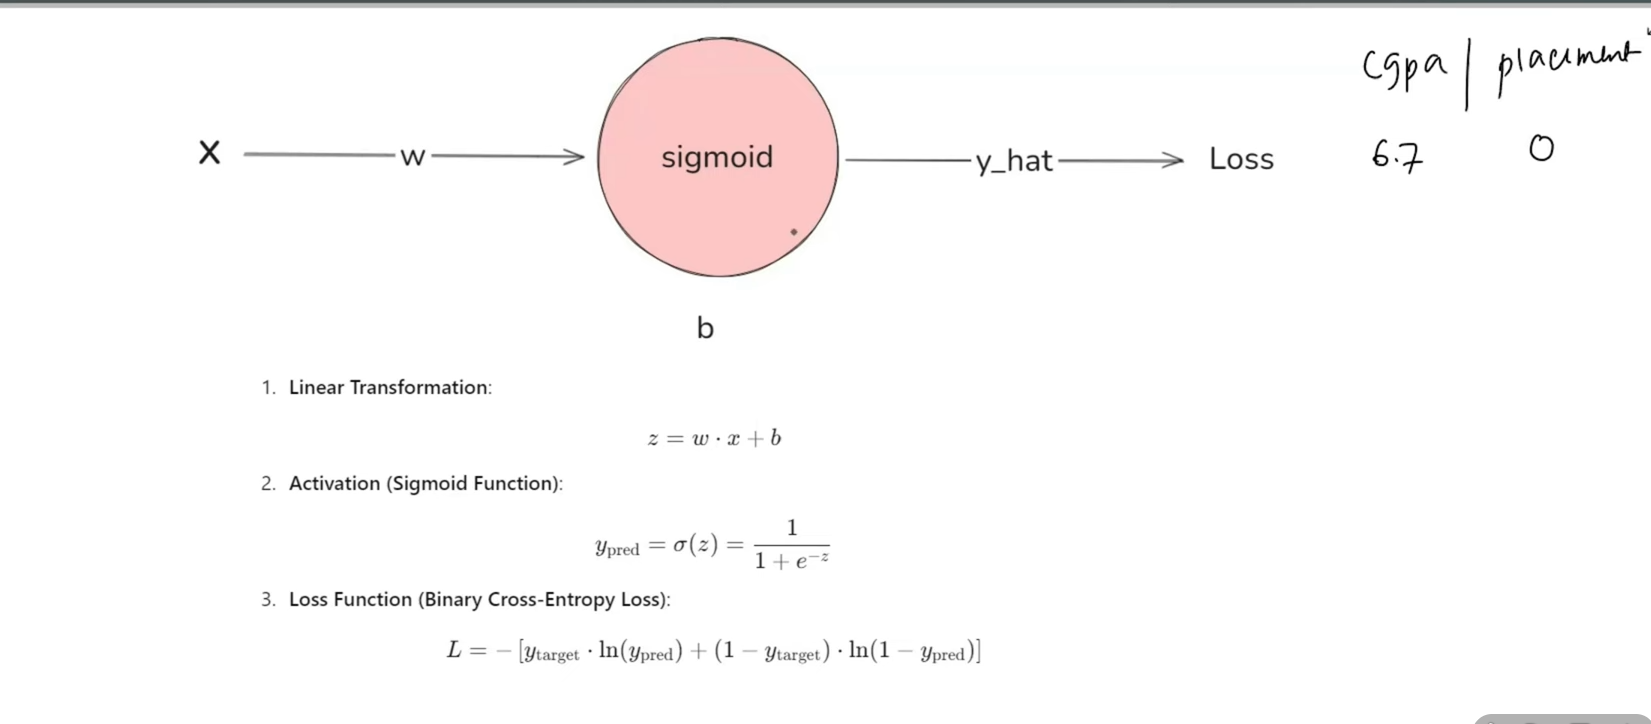

In [21]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

the next function is to calculate the next part, loss L
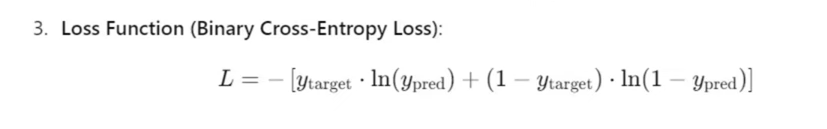

In [22]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [23]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [24]:
loss

tensor(6.7012)

In [25]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [27]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


#  **All these was done manually. now lets do it with AutoGrad**

In [28]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [29]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [30]:
w

tensor(1., requires_grad=True)

In [31]:
b

tensor(0., requires_grad=True)

In [32]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [33]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [35]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

this is our compuutational graph 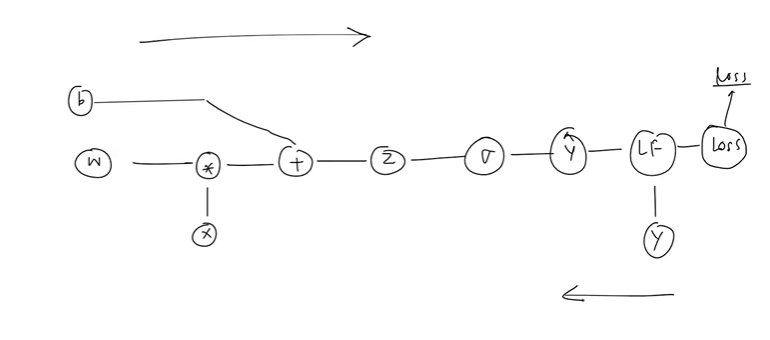

In [36]:
loss.backward()

In [37]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


## more functions of autograd

In [38]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [39]:
x

tensor([1., 2., 3.], requires_grad=True)

In [41]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [42]:
y.backward()

In [44]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [46]:
x.grad.zero_()

tensor([0., 0., 0.])

In [47]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)